In [14]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [15]:
df = pd.read_csv('/content/AttendanceMarksSA.csv')
df.head()
df.describe()

,Attendance,MSE,ESE
count,73.000000,73.000000,73.000000
mean,81.698630,9.780822,46.630137
std,9.506847,3.047069,6.617542
min,62.000000,3.000000,32.000000
25%,75.000000,8.000000,42.000000
50%,80.000000,10.000000,47.000000
75%,90.000000,11.000000,50.000000
max,98.000000,17.000000,64.000000


In [16]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Attendance,MSE,ESE
Attendance,1.000000,-0.080943,-0.109972
MSE,-0.080943,1.000000,0.751530
ESE,-0.109972,0.751530,1.000000


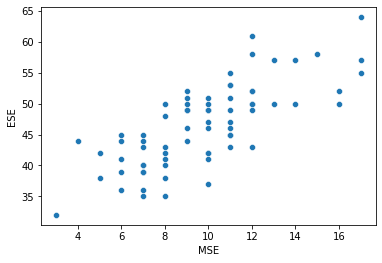

In [22]:
x=df['MSE']
y=df['ESE']
sns.scatterplot(x=x,y=y)

In [5]:
endog=df['ESE']
exog=sm.add_constant(df[['MSE']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


In [6]:
#Fit and Summarize OLS Model
mod=sm.OLS(endog, exog)
results=mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     92.14
Date:                Sun, 18 Oct 2020   Prob (F-statistic):           1.85e-14
Time:                        06:26:54   Log-Likelihood:                -210.66
No. Observations:                  73   AIC:                             425.3
Df Residuals:                      71   BIC:                             429.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.6664      1.741     17.616      0.0

In [19]:
def RSE(y_true, y_predicted) :
  y_true=np.array(y_true)
  y_predicted=np.array(y_predicted)
  RSS=np.sum(np.square(y_true - y_predicted))

  rse=math.sqrt(RSS / (len(y_true)-2))
  return rse

In [20]:
rse=RSE(df['ESE'],results.predict())
print(rse)

4.396224549647787


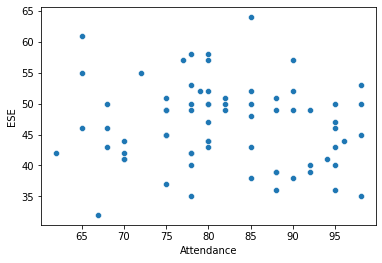

In [23]:
x1=df['Attendance']
y1=df['ESE']
sns.scatterplot(x=x1,y=y1)

In [10]:
endog1 = df['ESE']
exog1 = sm.add_constant(df[['Attendance']])
print(exog)

    const  MSE
0     1.0   10
1     1.0    7
2     1.0    3
3     1.0   16
4     1.0    9
..    ...  ...
68    1.0   10
69    1.0    8
70    1.0    9
71    1.0   11
72    1.0   12

[73 rows x 2 columns]


In [11]:
#Fit and Summarize OLS Model
mod1=sm.OLS(endog1, exog1)
results1=mod1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    ESE   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.8692
Date:                Sun, 18 Oct 2020   Prob (F-statistic):              0.354
Time:                        06:27:14   Log-Likelihood:                -240.58
No. Observations:                  73   AIC:                             485.2
Df Residuals:                      71   BIC:                             489.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.8841      6.753      7.831      0.0